In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [3]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols
df["functional"] = (df["functional"] =="Yes").astype(int)
df = df[df["hour"]==12]
df = df.drop(["hour"],axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


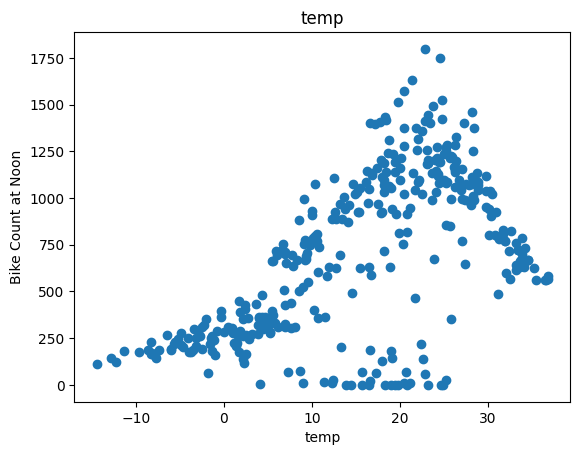

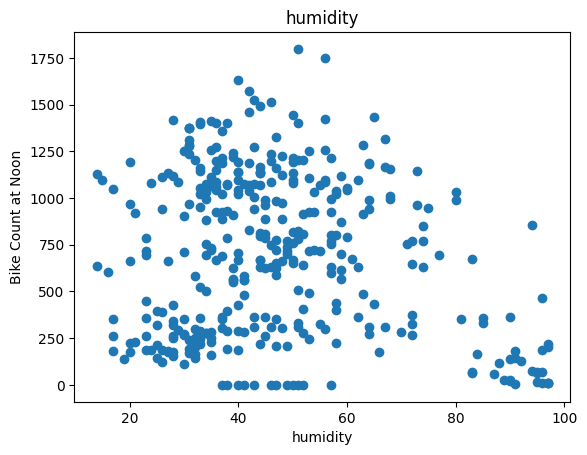

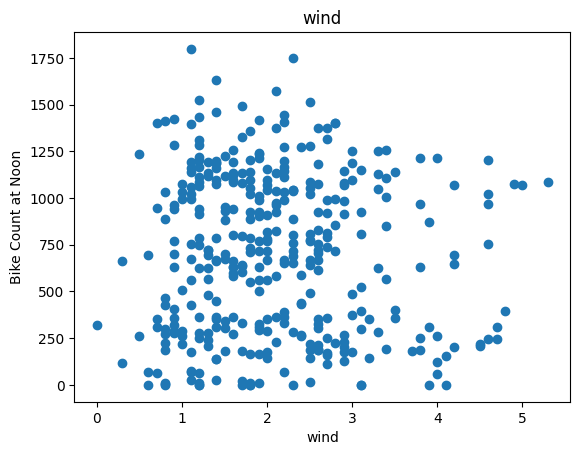

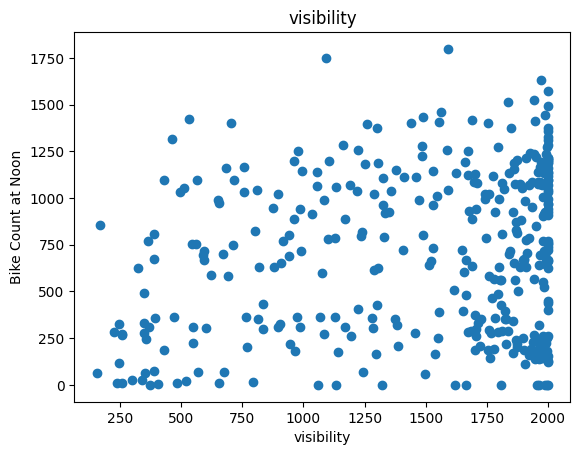

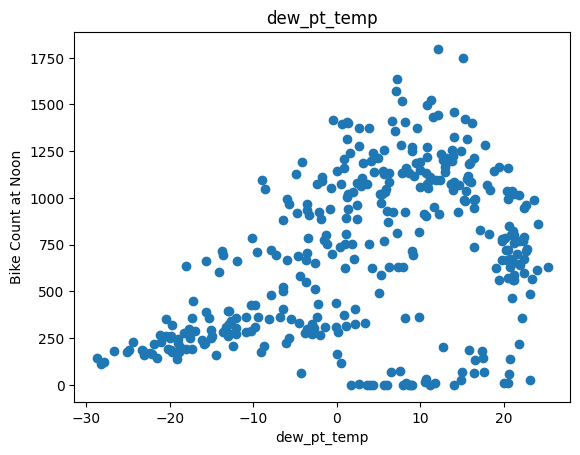

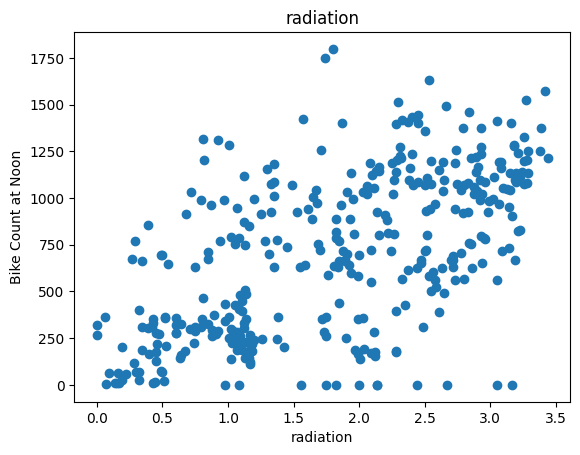

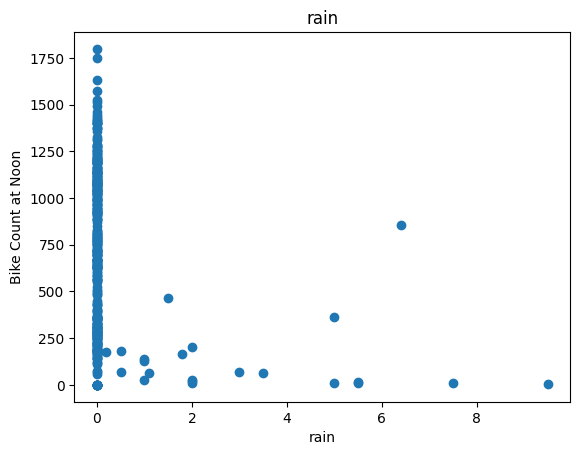

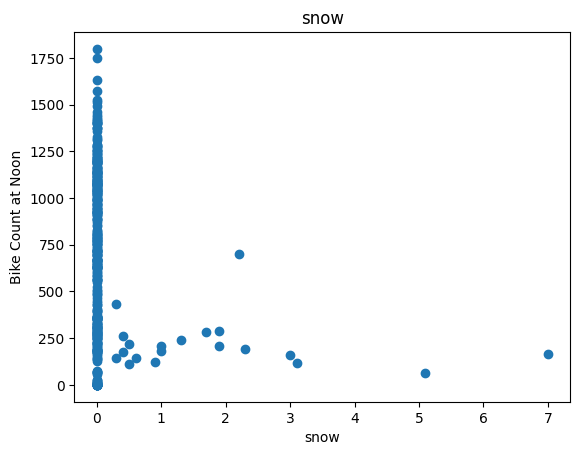

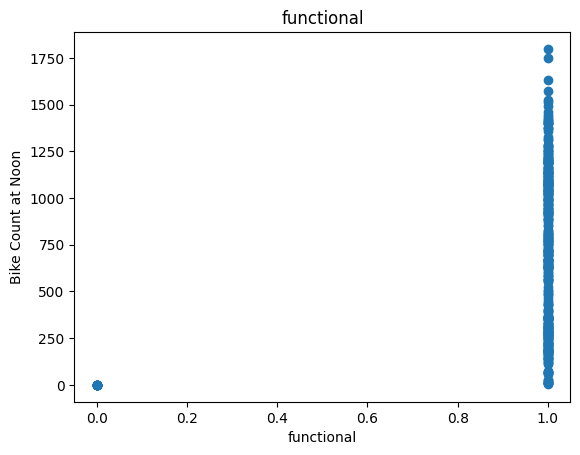

In [5]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [6]:
df = df.drop(["wind","visibility","functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Train Test and Validate Dataset

In [7]:
train ,val ,test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

def get_xy(dataframe, y_label , x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)== 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values
    y=dataframe [y_label].values.reshape(-1,1)
    data= np.hstack((X,y))

    return data,X,y

d:\Learning\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
_,X_train_temp ,y_train_temp = get_xy(train,"bike_count", x_labels=["temp"])
_,X_val_temp ,y_val_temp = get_xy(val,"bike_count", x_labels=["temp"])
_,X_test_temp,y_test_remp = get_xy(test,"bike_count", x_labels=["temp"])

In [9]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [10]:
temp_reg.score(X_test_temp, y_test_remp)

0.2934708183187891

In [11]:
print(temp_reg.coef_,temp_reg.intercept_)

[[21.33065619]] [373.95869635]


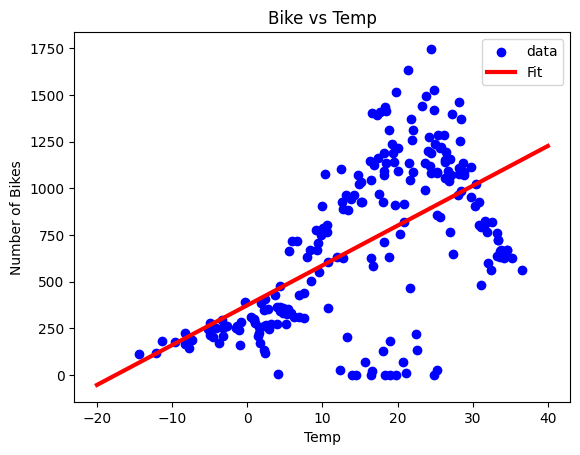

In [12]:
plt.scatter(X_train_temp,y_train_temp, label = "data",color = "blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color = "red",linewidth = 3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

Multiple Linear Regression

In [13]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

d:\Learning\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [15]:
all_reg.score(X_test_all, y_test_all)

0.36472062695128615

In [16]:
y_pred_lr = all_reg.predict(X_test_all)

Regression with Neural Net

In [17]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

d:\Learning\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [20]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [21]:
history  = temp_nn_model.fit(
    X_train_temp.reshape(-1),y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data = (X_val_temp,y_val_temp)
)

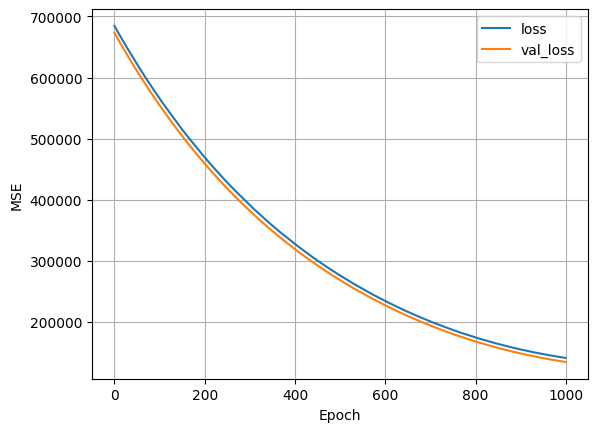

In [22]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


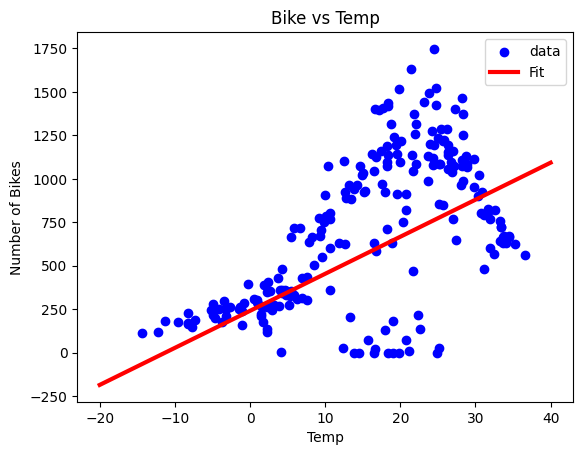

In [23]:
plt.scatter(X_train_temp,y_train_temp, label = "data",color = "blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color = "red",linewidth = 3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

Neural Net

In [24]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [25]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data = (X_val_temp,y_val_temp),
    verbose = 0, epochs = 100
)

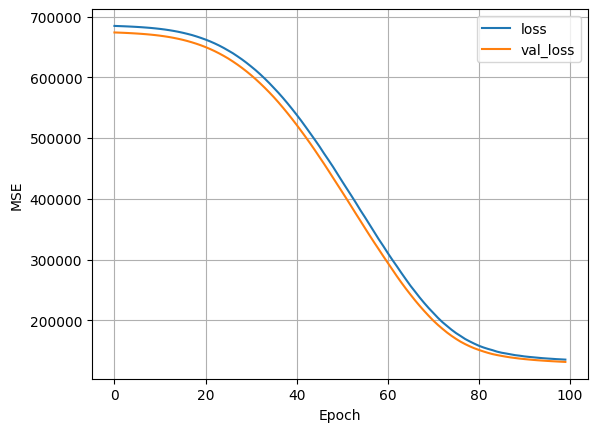

In [26]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


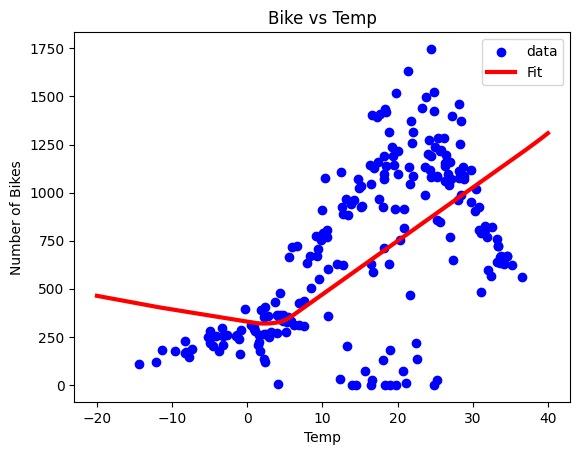

In [27]:
plt.scatter(X_train_temp,y_train_temp, label = "data",color = "blue")
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color = "red",linewidth = 3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [28]:
all_normalizer = tf.keras.layers.Normalization(input_shape = (6,), axis=1)
all_normalizer.adapt(X_train_all)

In [29]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [37]:
history = nn_model.fit(
    X_train_all,y_train_all,
    validation_data = (X_val_all,y_val_all),
    verbose =0,
    epochs=100
)

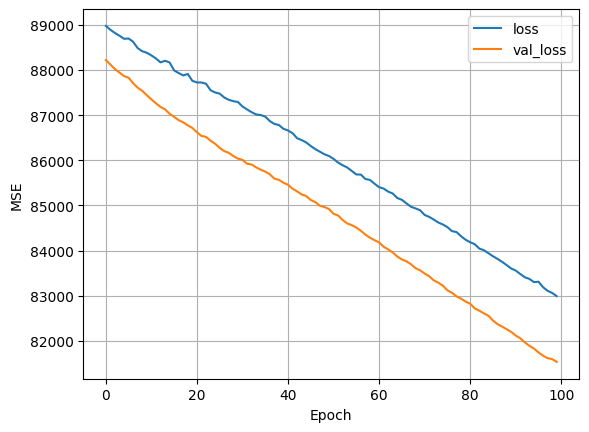

In [39]:
plot_loss(history)